# Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. ##
***
**Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.**
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

# Первичное ознакомление с данными

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

## Гипотезы

In [3]:
pd.options.display.max_colwidth = None
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Заказы

In [4]:
orders.date = orders.date.map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
orders.groupby('group').agg({'revenue':['sum', 'mean', 'count']})

revenue                   
           sum         mean count
group                            
A      4084803  7333.578097   557
B      5907760  9230.875000   640

In [6]:
print('Общая сумма заказов в обеих группах составила', orders.revenue.sum(), 'рубля')

Общая сумма заказов в обеих группах составила 9992563 рубля


In [7]:
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


In [8]:
print('Количество пропусков:')
orders.isna().sum()

Количество пропусков:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

***
- Всего 1197 заказов на общую сумму 9992563 рублей.
- На группу А пришлось 557 заказов на сумму 4084803 рубля, средняя сумма заказа 7333 рубля.
- На группу В пришлось 640 заказов на сумму 5907760 рубля, средняя сумма заказа 9230 рублей
***

## Посетители

In [9]:
visitors.date = visitors.date.map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [10]:
visitors.groupby('group').agg({'visitors':'sum'})

,visitors
group,
A,18736
B,18916


In [11]:
print('Количество дубликатов:', visitors.duplicated().sum())

Количество дубликатов: 0


In [12]:
print('Количество пропусков:')
visitors.isna().sum()

Количество пропусков:


date        0
group       0
visitors    0
dtype: int64

***
***В группу А вошло 18763 пользователя, в группу В - 18916 пользователей***
***

# Приоритизация гипотез

***
**Задача:**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
***

## ICE

In [13]:
hypothesis['ICE'] = round((hypothesis.Impact * hypothesis.Confidence) / hypothesis.Efforts, 2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


## RICE

In [14]:
hypothesis['RICE'] = (hypothesis.Reach * hypothesis.Impact * hypothesis.Confidence) / hypothesis.Efforts
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


***
**Разница между методами приоритизации гипотез ICE и RICE заключается в использовании параметра Reach в расчете. Это параметр оценки количества пользователей, которых затронет вносимое изменение. RICE будет в Reach раз больше, чем ICE**

**При сортировке по параметру RICE расстановка приоритетов меняется:**
- гипотеза №2 '**Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**' поднимается из середины списка на второе место. Причина в низкой стоимости ее проверки (Efforts = 3) и в том, что добавление блоков рекомендаций коснется многих, если не всех пользователей интернет-магазина
- гипотеза №8 '**Запустить акцию, дающую скидку на товар в день рождения**' характеризуется низким Reach - лишь небольшая доля пользователей в конкретный день являются именинниками

**В конечном итоге наиболее приоритетной по RICE является гипотеза №7, на ней идут 2, 0 и 6**
***

# Анализ A/B-теста

In [15]:
unique_users_A = orders.query('group == "A"').visitorId.unique()
unique_users_B = orders.query('group == "B"').visitorId.unique()
intersection_of_groups = np.intersect1d(unique_users_A, unique_users_B)

In [16]:
len(np.intersect1d(unique_users_A, unique_users_B))

58

## Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [17]:
datesgroups = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)
#создаем уникальные пары дата-группа

In [18]:
cumulative_orders = datesgroups.apply(lambda x: orders[
    np.logical_and(orders.date <= x.date, orders.group == x.group)] \
    .agg(
    {'date':'max',
     'group':'max',
     'revenue':'sum',
     'visitorId':'nunique',
     'transactionId':'nunique'})
,axis=1,).sort_values(by=['date', 'group']) #датафрейм с кумулятивной выручкой, количеством уникальных покупателей 
                                            #и заказов

cumulative_orders.columns = ['date', 'group', 'revenue', 'buyers', 'orders']

cumulative_orders_A = cumulative_orders.query('group=="A"')
cumulative_orders_B = cumulative_orders.query('group=="B"')

In [1]:
import plotly.express as px

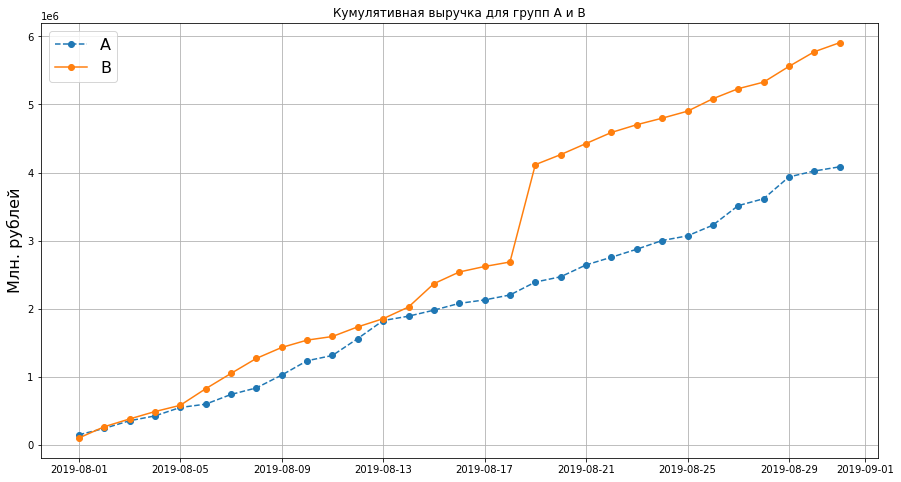

In [19]:
plt.figure(figsize=(15,8))
plt.plot(cumulative_orders_A.date, cumulative_orders_A.revenue, label='A', linestyle='--', marker='o')
plt.plot(cumulative_orders_B.date, cumulative_orders_B.revenue, label='B', marker='o')
plt.legend(fontsize=16)
plt.grid(visible=True)
plt.ylabel('Млн. рублей',fontsize=16)
plt.title('Кумулятивная выручка для групп А и В')
plt.show()

***
**На графике кумулятивной выручки группа В опережает группу А практически на всем протяжении месяца, начиная с 6 августа. 13 августа линии на графике сближаются - в группе А был аномально большой заказ на сумму 92550 рублей - однако после разрыв снова увеличивается. Резкий рост кумулятивной выручки в группе В связан с еще одним аномально большим заказом на 1294500 рублей**
***

## Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

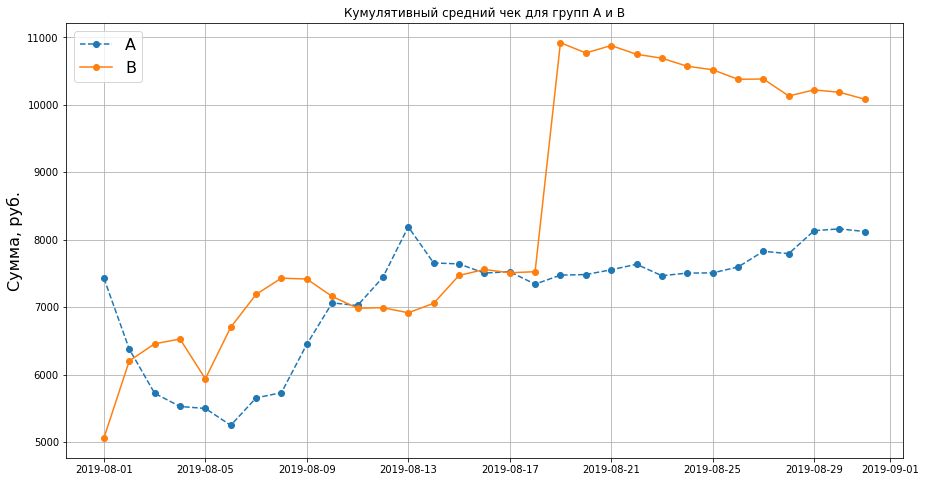

In [20]:
plt.figure(figsize=(15,8))
plt.plot(cumulative_orders_A.date, cumulative_orders_A.revenue/cumulative_orders_A.buyers, label='A', \
        linestyle='--', marker='o')
plt.plot(cumulative_orders_B.date, cumulative_orders_B.revenue/cumulative_orders_B.buyers, label='B', marker='o')
plt.legend(loc=2, fontsize=16)
plt.ylabel('Сумма, руб.', fontsize=16)
plt.title('Кумулятивный средний чек для групп А и В')
plt.grid(visible=True)
plt.show()

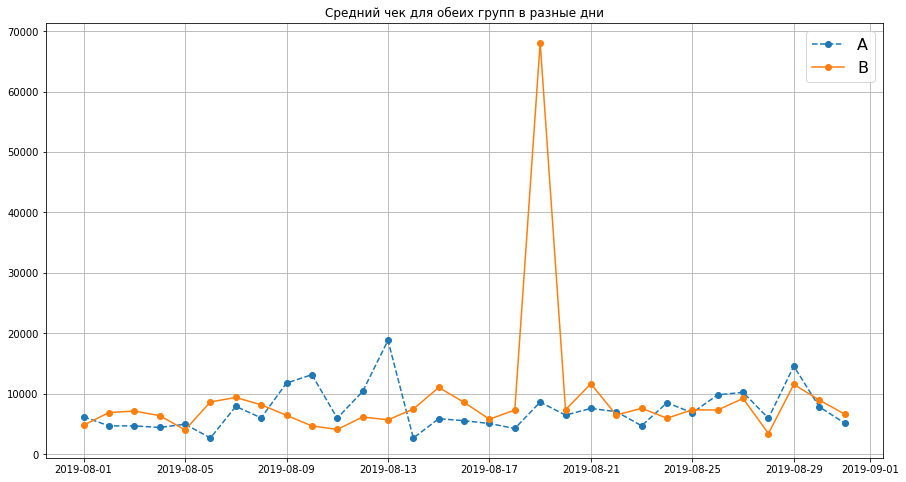

In [21]:
mean_receipt_A = orders.query('group=="A"').groupby('date', as_index=False).agg({'revenue':'sum', 'transactionId':'count'})
mean_receipt_A['mean_receipt'] = mean_receipt_A.revenue / mean_receipt_A.transactionId

mean_receipt_B = orders.query('group=="B"').groupby('date', as_index=False).agg({'revenue':'sum', 'transactionId':'count'})
mean_receipt_B['mean_receipt'] = mean_receipt_B.revenue / mean_receipt_B.transactionId

plt.figure(figsize=(15,8))
plt.plot(mean_receipt_A.date, mean_receipt_A.mean_receipt, label='A', linestyle='--', marker='o')
plt.plot(mean_receipt_B.date, mean_receipt_B.mean_receipt, label='B', marker='o')
plt.legend(fontsize=16)
plt.grid(visible=True)
plt.title('Средний чек для обеих групп в разные дни')
plt.show()

***
**Изменения на графике кумулятивного среднего чека напоминают предыдущий график, с резким ростом для группы А - 13 августа, а для группы В - 19 августа.**

**Аномально большие заказы дают выбросы и на графике среднего чека без накопления, но в остальные дни средний чек обеих групп различается незначительно, перевес то в одну, то в другую сторону. Есть ли статистически значимые различия между двумя группами мы проверим позднее**
***

## Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [22]:
merged_cumulative_orders = cumulative_orders_A.merge \
(cumulative_orders_B, left_on='date', right_on='date', suffixes=["A", 'B'])

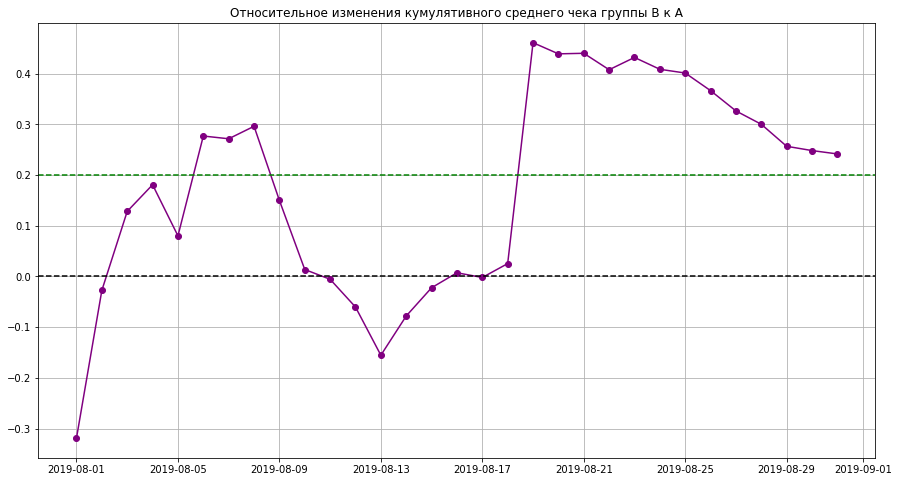

In [23]:
plt.figure(figsize=(15,8))
plt.plot(merged_cumulative_orders.date, (merged_cumulative_orders.revenueB / merged_cumulative_orders.buyersB)/
        (merged_cumulative_orders.revenueA/merged_cumulative_orders.buyersA)-1, marker='o', linestyle='-', color='purple')
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=0.2, linestyle='--', color='green')
plt.title('Относительное изменения кумулятивного среднего чека группы В к А')
plt.grid(visible=True)
plt.show()

***
**Кроме первых двух дней месяца, а также периода с 11 по 15 число, кумуливный средний чек группы В превышает таковой для группы А. Разница достигает 30 и даже 45% в дни выбросов, однако затем снова снижается. Можно предположить, что истинная разница колеблется в коридоре от 10 до 20% - однако мы пока не учли выбросы**
***

## Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [24]:
cumulative_visitors = datesgroups.apply(lambda x:
visitors[np.logical_and(visitors.date <= x.date, visitors.group == x.group)]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) \
.sort_values(by=['date', 'group']) #датафрейм с количеством посетителей с накоплениемм для обеих групп

In [25]:
cumulative_data = cumulative_orders.merge(cumulative_visitors, \
left_on=['date', 'group'], right_on = ['date', 'group'])

cumulative_data['conversion'] = cumulative_data.buyers / cumulative_data.visitors
# таблица с накоплением - выручка, покупатели, заказы, посетители, конверсия

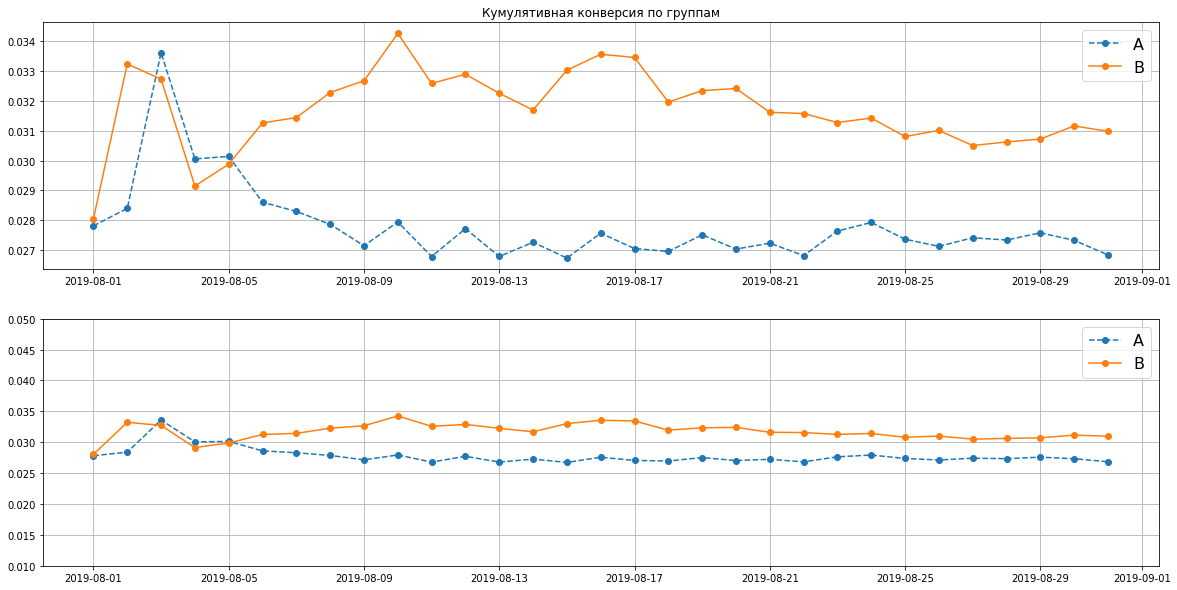

In [26]:
cumulative_data_A = cumulative_data.query('group == "A"')
cumulative_data_B = cumulative_data.query('group=="B"')

plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
plt.plot(cumulative_data_A.date, cumulative_data_A.conversion, label='A', linestyle='--', marker='o')
plt.plot(cumulative_data_B.date, cumulative_data_B.conversion, label='B', marker='o')
plt.legend(fontsize=16)
plt.grid(visible=True)
plt.title('Кумулятивная конверсия по группам')

plt.subplot(2,1,2)
plt.plot(cumulative_data_A.date, cumulative_data_A.conversion, label='A', linestyle='--', marker='o')
plt.plot(cumulative_data_B.date, cumulative_data_B.conversion, label='B', marker='o')
plt.legend(fontsize=16)
plt.grid(visible=True)
plt.ylim(0.01, 0.05)
plt.show()

***
**Кумулятивная конверсия для группы В превышает аналогичный показатель для группы А на протяжении всего рассматриваемого периода. К 25 августа показатели выходят на плато:**
- группа А - 2.7 %
- группа В - 3.1 %

**Вряд ли мы увидим значимые изменения конверсии при дальнейшем проведении теста**
***

## Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

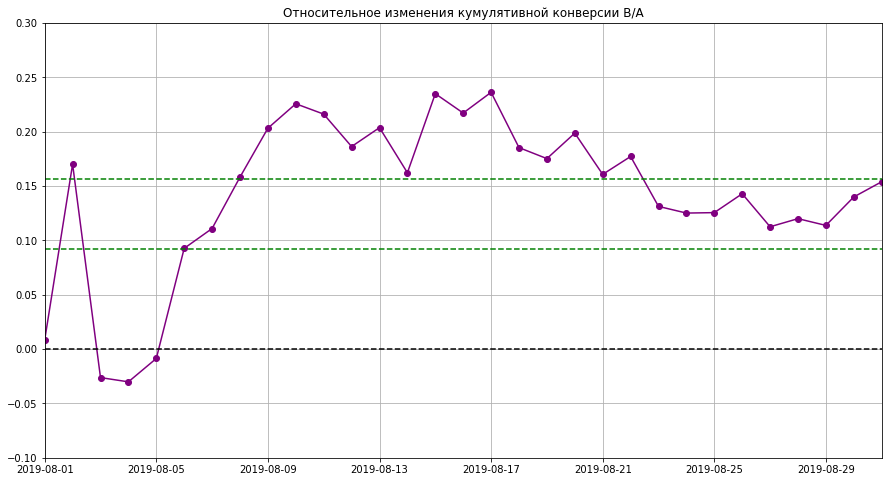

In [27]:
merged_cumulative_conversion = cumulative_data_A[['date', 'conversion']]\
.merge(cumulative_data_B[['date', 'conversion']], left_on='date', right_on='date',\
suffixes=['A', 'B'])

plt.figure(figsize=(15,8))
plt.plot(merged_cumulative_conversion.date, merged_cumulative_conversion.conversionB/ \
merged_cumulative_conversion.conversionA - 1, marker='o', color='purple')
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=0.156, linestyle='--', color='green')
plt.axhline(y=0.092, linestyle='--', color='green')
plt.title('Относительное изменения кумулятивной конверсии В/А')
plt.grid(visible=True)
plt.axis([merged_cumulative_conversion.date.min(),
          merged_cumulative_conversion.date.max(), -0.1, 0.3])
plt.show()

***
**Этот график соотносится с предыдущим - относительная разница конверсии между группами к концу рассматриваемого периода стабилизируется вблизи отметки в 12,5%**
***

## Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

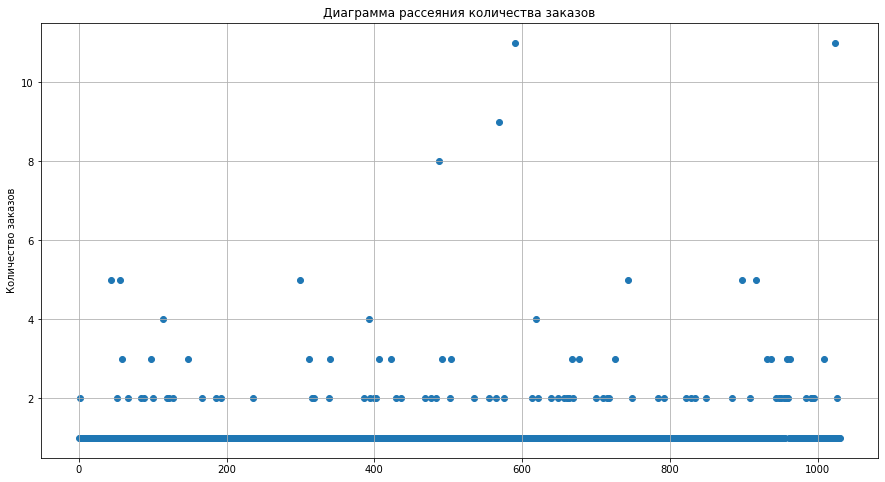

In [28]:
orders_by_users = orders.groupby('visitorId', as_index=False)\
.agg({'transactionId':'nunique'})
orders_by_users.columns = ['visitorId', 'orders']

x_values=range(0, len(orders_by_users))

plt.figure(figsize=(15,8))
plt.scatter(x_values, orders_by_users.orders)
plt.grid(visible=True)
plt.ylabel('Количество заказов')
plt.title('Диаграмма рассеяния количества заказов')
plt.show()

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [29]:
print('95-й персентиль, заказов:', int(np.percentile(orders_by_users.orders, [95])))
print('99-й персентиль, заказов:', int(np.percentile(orders_by_users.orders, [99])))

95-й персентиль, заказов: 2
99-й персентиль, заказов: 4


***
**Подавляющее большинство пользователей оформили лишь 1 заказ, 99% сделали 4 и менее заказов**

**Аномальными будем считать пользователей, совершивших более 4 заказов**
***

## Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

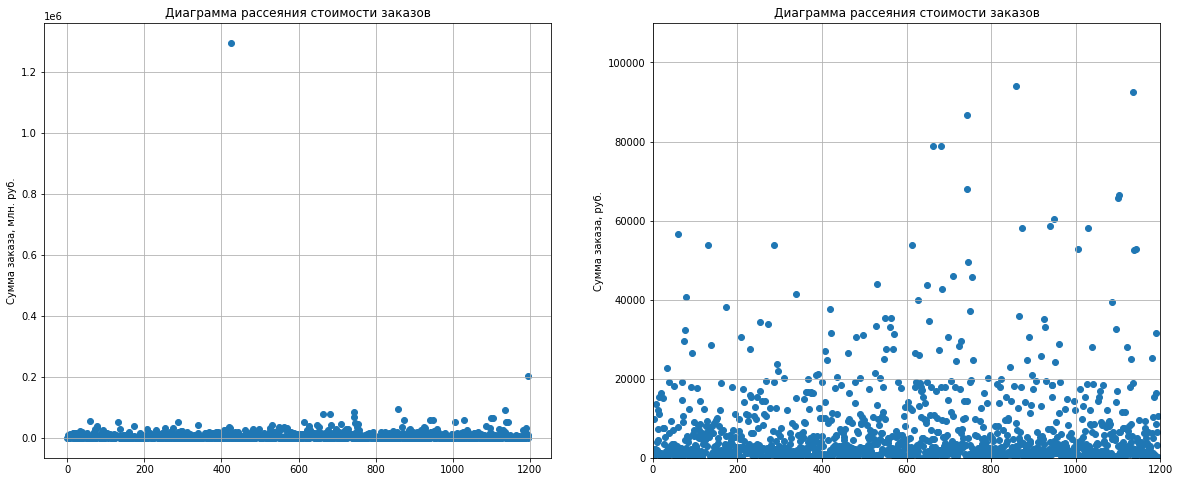

In [30]:
x_values = range(0, len(orders))

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x_values, orders.revenue)
plt.ylabel('Сумма заказа, млн. руб.')
plt.grid(visible=True)
plt.title('Диаграмма рассеяния стоимости заказов')

plt.subplot(1,2,2)
plt.scatter(x_values, orders.revenue)
plt.title('Диаграмма рассеяния стоимости заказов')
plt.axis([0, 1200, 0, 110000])
plt.ylabel('Сумма заказа, руб.')
plt.grid(visible=True)
plt.show()


### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [31]:
print('95-й персентиль, сумма:', int(np.percentile(orders.revenue, [95])))
print('99-й персентиль, сумма:', int(np.percentile(orders.revenue, [99])))

95-й персентиль, сумма: 28000
99-й персентиль, сумма: 58233


***
**Аномальными будем считать заказы на сумму, превышающую 58233 рубля**
***

## Гипотезы
***
- Н0 - разницы в конверсии между группами нет
- Н1 - конверсия в группах А и В отличается
***
- Н0 - разницы в сумме среднего чека между группами нет
- Н1 - сумма среднего чека в группах А и В отличается

## Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [32]:
orders_by_users_A = orders.query('group=="A"') \
.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_by_users_A.columns = ['visitorId', 'orders']

orders_by_users_B = orders.query('group=="B"') \
.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_by_users_B.columns = ['visitorId', 'orders']

A_num_visitors = visitors.query('group=="A"').visitors.sum()
B_num_visitors = visitors.query('group=="B"').visitors.sum()


In [33]:
sample_A = pd.concat(
    [orders_by_users_A.orders, \
     pd.Series(0,index=np.arange(
        A_num_visitors - len(orders_by_users_A.orders)), name='orders')], axis=0)

In [34]:
sample_B = pd.concat(
    [orders_by_users_B.orders, \
     pd.Series(0,index=np.arange(
        B_num_visitors - len(orders_by_users_B.orders)), name='orders')], axis=0)

In [35]:
print('p-value, Mann-Whitney:', '{0:.3f}'.format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print('Относительный прирост конверсии', '{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))
print('p-value, t-test:', '{0:.3f}'.format(stats.ttest_ind(sample_A, sample_B)[1]))

p-value, Mann-Whitney: 0.017
Относительный прирост конверсии 0.138
p-value, t-test: 0.048


***
**И параметрический Т-тест, и непараметрический тест Манна-Уитни дают p-value менее установленного уровня значимости 0.05. У нас есть основания отвергнуть нулевую гипотезу, различия к конверсии между группами статистически значимы.**

**Относительный прирост конверсии по сырым данным между группами В и А составил около 13,8%**
***

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [36]:
print('p-value, Mann-Whitney:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders.query('group=="A"').revenue, orders.query('group=="B"').revenue)[1]))
print('Относительный прирост среднего чека', '{0:.3f}'.format(
    orders.query('group=="B"').revenue.mean() / orders.query('group=="A"').revenue.mean() -1))
print('p-value, t-test:', '{0:.3f}'.format(stats.ttest_ind(
    orders.query('group=="A"').revenue, orders.query('group=="B"').revenue)[1]))

p-value, Mann-Whitney: 0.729
Относительный прирост среднего чека 0.259
p-value, t-test: 0.404


***
**Относительный прирост среднего чека по сырым данным составил 25%, однако эта разница, похоже, не значима статистически и обусловлена наличием выбросов. Оснований отвергнуть нулевую гипотезу нет**
***

## Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [37]:
users_with_many_orders = pd.concat([orders_by_users_A.query('orders > 4').visitorId, \
                                   orders_by_users_B.query('orders > 4').visitorId], axis=0)
users_with_expensive_orders = orders.query('revenue > 58233').visitorId

abnormal_users = pd.concat([users_with_expensive_orders, users_with_many_orders], axis=0) \
.drop_duplicates().sort_values()

In [38]:
filtered_sample_A = pd.concat(
    [orders_by_users_A
     [np.logical_not(orders_by_users_A.visitorId.isin(abnormal_users))].orders, \
     pd.Series(0,index=np.arange(
        A_num_visitors - len(orders_by_users_A.orders)), name='orders')], axis=0)

In [39]:
filtered_sample_B = pd.concat(
    [orders_by_users_B
     [np.logical_not(orders_by_users_B.visitorId.isin(abnormal_users))].orders, \
     pd.Series(0,index=np.arange(
        B_num_visitors - len(orders_by_users_B.orders)), name='orders')], axis=0)

In [40]:
print('p-value, Mann-Whitney:','{0:.3f}'.format(stats.mannwhitneyu(filtered_sample_A, filtered_sample_B)[1]))
print("Относительный прирост конверсии:",'{0:.3f}'.format(filtered_sample_B.mean() / filtered_sample_A.mean() - 1))
print('p-value, ttest:''{0:.3f}'.format(stats.ttest_ind(filtered_sample_A, filtered_sample_B)[1]))

p-value, Mann-Whitney: 0.014
Относительный прирост конверсии: 0.153
p-value, ttest:0.025


***
**При проверке гипотезы на очищенных данных статистическая значимость наших выводов не меняется - можно принять альтернативную гипотезу о значимых различиях конверсии между группами. Относительный прирост на очищенных данных составил 15.3%**
***

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [41]:
print('p-value, Mann-Whitney:','{0:.3f}'.format(
    stats.mannwhitneyu(
        orders[np.logical_and(
            orders.group == 'A', np.logical_not(
                orders.visitorId.isin(abnormal_users)),)]['revenue'],
    orders[np.logical_and(orders.group=='B', np.logical_not(orders.visitorId.isin(abnormal_users)),)]['revenue'],)[1]))



print('Относительный прирост среднего чека','{0:.3f}'.format(
        orders[np.logical_and(
            orders['group']=='B',
                np.logical_not(orders.visitorId.isin(abnormal_users)),)]['revenue'].mean()
    / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders.visitorId.isin(abnormal_users)),)]['revenue'].mean()- 1)) 


p-value, Mann-Whitney: 0.851
Относительный прирост среднего чека -0.006


***
**После очистки относительный рост среднего чека практически отсутствует(по неочищенным - целых 25%!). Похоже, нулевая гипотеза верна и статистически значимых отличий в среднем чеке между группами нет**

***

# Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Кумулятивные показатели группы В выше, чем в группе А:
- кумулятивная выручка на 30-й день выше почти на 200.000 рублей
- кумулятивный средний чек - на 2000 рублей (10.000 против 8000)
- кумулятивная конверсия выше на 0.4% в абсолютных значениях (3.1% против 2.7%) и на 15% - в относительных

В данных есть выбросы - пользователи с аномально большим количеством заказов и заказы на аномально большие суммы. 
Мы избавились от заказов на сумму более 58.000 рублей и пользователей, сделавших более 4 заказов - то есть отсекли последний процентиль в каждом случае - и проанализировали показатели обеих групп, сравнили их друг с другом и проверили гипотезы о равенстве конверсии и суммы среднего чека.

Применив непараметрический критерий Манна-Уитни в случае конверсии мы получили статистически значимые отличия между группами В и А b и на сырых, и на очищенных данных (p-value = 0.017 и 0.015, соответственно). Относительный прирост составил 13,8 и 15,4 процента, соответственно. Мы можем принять альтернативную гипотезу.

В случае среднего чека нулевую гипотезу опровергнуть не удалось - p-value равен 0.729 для сырых данных и 0.851 для очищенных. Относительный прирост на очищенных данных практически отсутствует, разница 0.006 в пользу группы А

Принято решение остановить тест. Фиксируем относительный прирост конверсии в группе В на 15%, при отсутствии различий с сумме среднего чека.

